# Exploratory Data Analysis (EDA) dari Data hasil Transform

In [285]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import re

In [286]:
# Load the dataset
products_used_features = pd.read_csv('../data/products_used_features.csv')
products_extracted_features = pd.read_csv('../data/products_extracted_features.csv')
products_integrated_features = pd.read_csv('../data/products_integrated_features.csv', encoding='ISO-8859-1')

## products_used_features

In [287]:
# Dataset products_used_features
products_used_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,age,rating_star,recommended,image
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"sorry aku kurang cocok sama produk ini, karena...",Dry,18 and Under,3.0,False,https://image.femaledaily.com/dyn/210/images/p...
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",Combination,19 - 24,5.0,True,https://image.femaledaily.com/dyn/210/images/p...
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",Combination,18 and Under,5.0,True,https://image.femaledaily.com/dyn/210/images/p...
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,produk ini tu menurut aku cocok nya buat yang ...,Oily,18 and Under,3.0,False,https://image.femaledaily.com/dyn/210/images/p...
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",Dry,18 and Under,4.0,True,https://image.femaledaily.com/dyn/210/images/p...


In [288]:
# Cek information about the dataset
products_used_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111635 entries, 0 to 111634
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   url            111635 non-null  object 
 1   product_name   111635 non-null  object 
 2   brand          111635 non-null  object 
 3   category       111635 non-null  object 
 4   price          111635 non-null  int64  
 5   rating         111635 non-null  float64
 6   total_reviews  111635 non-null  int64  
 7   description    111169 non-null  object 
 8   review         111563 non-null  object 
 9   skin_type      107568 non-null  object 
 10  age            111385 non-null  object 
 11  rating_star    111564 non-null  float64
 12  recommended    100222 non-null  object 
 13  image          111635 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 11.9+ MB


In [289]:
# Cek jumlah data
print(f"Jumlah data pada products_used_features: {len(products_used_features)}")

Jumlah data pada products_used_features: 111635


In [290]:
# Cek data yang hilang
print("Data yang hilang pada products_used_features:")
print(products_used_features.isnull().sum())

Data yang hilang pada products_used_features:
url                  0
product_name         0
brand                0
category             0
price                0
rating               0
total_reviews        0
description        466
review              72
skin_type         4067
age                250
rating_star         71
recommended      11413
image                0
dtype: int64


In [291]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_used_features: {products_used_features.duplicated().sum()}")

Jumlah data duplikat pada products_used_features: 66


# products_extracted_features

In [292]:
# Dataset products_extracted_features
products_extracted_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,...,image,text_combined,found_ingredients,found_skin_concern,found_skin_goal,std_skin_concern,std_ingredients,std_skin_goal,ingredient_categories,ingredient_category
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",['combination'],...,https://image.femaledaily.com/dyn/210/images/p...,"dipake buat csm-an enak bgt, teksturnya cair, ...",hyaluronic acid,"jerawat, acne",NaN,acne,hyaluronic acid,NaN,['hydrating'],['hydrating']
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",['combination'],...,https://image.femaledaily.com/dyn/210/images/p...,"luvvvv banget, calming muka kalo lagi rewel, l...",hyaluronic acid,kemerahan,calming,redness,hyaluronic acid,calming,['hydrating'],['hydrating']
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",['dry'],...,https://image.femaledaily.com/dyn/210/images/p...,"di aku cukip bantu lembab tapi g kyk yg, woww ...",hyaluronic acid,NaN,NaN,NaN,hyaluronic acid,NaN,['hydrating'],['hydrating']
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,moisturizer yg ringan dan cepat meresap. pake ...,['oily'],...,https://image.femaledaily.com/dyn/210/images/p...,moisturizer yg ringan dan cepat meresap. pake ...,hyaluronic acid,NaN,cepat meresap,NaN,hyaluronic acid,fast-absorbing,['hydrating'],['hydrating']
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,Awalnya kulitku benar-benar kering & terasa ka...,['dry'],...,https://image.femaledaily.com/dyn/210/images/p...,awalnya kulitku benar-benar kering & terasa ka...,hyaluronic acid,kulit kering,NaN,dryness,hyaluronic acid,NaN,['hydrating'],['hydrating']


In [293]:
# Cek information about the dataset
products_extracted_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    88176 non-null  object 
 1   product_name           88176 non-null  object 
 2   brand                  88176 non-null  object 
 3   category               88176 non-null  object 
 4   price                  88176 non-null  int64  
 5   rating                 88176 non-null  float64
 6   total_reviews          88176 non-null  int64  
 7   description            87761 non-null  object 
 8   review                 88176 non-null  object 
 9   skin_type              88176 non-null  object 
 10  age                    88058 non-null  object 
 11  rating_star            88176 non-null  int64  
 12  recommended            88176 non-null  bool   
 13  image                  88176 non-null  object 
 14  text_combined          88176 non-null  object 
 15  fo

In [294]:
# Cek jumlah data
print(f"Jumlah data pada products_extracted_features: {len(products_extracted_features)}")

Jumlah data pada products_extracted_features: 88176


In [295]:
# Cek missing data
print("Data yang hilang pada products_extracted_features:")
print(products_extracted_features.isnull().sum())

Data yang hilang pada products_extracted_features:
url                          0
product_name                 0
brand                        0
category                     0
price                        0
rating                       0
total_reviews                0
description                415
review                       0
skin_type                    0
age                        118
rating_star                  0
recommended                  0
image                        0
text_combined                0
found_ingredients        29858
found_skin_concern       29684
found_skin_goal          34085
std_skin_concern         29684
std_ingredients          29858
std_skin_goal            34085
ingredient_categories    29859
ingredient_category          0
dtype: int64


In [296]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_extracted_features: {products_extracted_features.duplicated().sum()}")

Jumlah data duplikat pada products_extracted_features: 53


# products_integrated_features

In [297]:
# Dataset products_integrated_features
products_integrated_features.head()

,url,image,product_name,brand,category,price,rating,skin_type,total_reviews,skin_concern,ingredients,skin_goal,ingredient_category,age,rating_star
0,https://reviews.femaledaily.com/products/treat...,https://image.femaledaily.com/dyn/210/images/p...,10% Lactic + Glycolic Peeling Serum,Somethinc,Peeling,150000,4.0,"['dry', 'normal']",520,"['acne', 'blackheads']","['bha, glycerin, salicylic acid', 'glycerin, s...","['brightening', 'hydrating']",['hydrating'],25 - 29,4.75
1,https://reviews.femaledaily.com/products/treat...,https://image.femaledaily.com/dyn/210/images/p...,2 Minute Peeling Gel,Osho,Peeling,150000,3.9,"['combination', 'dry']",357,"['sensitive', 'irritation']",['aloe vera'],"['hydrating', 'smoothing']",['calming'],19 - 24,4.647.058.823.529.410
2,https://reviews.femaledaily.com/products/treat...,https://image.femaledaily.com/dyn/300/error-im...,2% Salicylic Acid BHA Acne Spot Treatment,Skintific,Acne treatment,139000,3.9,"['combination', 'oily']",30856,"['acne', 'redness']","['centella asiatica, niacinamide, salicylic ac...","['calming', 'fast-absorbing']",['brightening'],25 - 29,456.390.977.443.609
3,https://reviews.femaledaily.com/products/treat...,https://image.femaledaily.com/dyn/210/images/p...,3 Minute Exfo Gel,Cleora Beauty,Peeling,57000,3.7,"['combination', 'oily']",10640,"['pores', 'blackheads']","['aloe vera, bha, hyaluronic acid, pha, retino...","['pore-minimizing', 'brightening']","['hydrating', 'brightening']",19 - 24,4.589.473.684.210.520
4,https://reviews.femaledaily.com/products/clean...,https://image.femaledaily.com/dyn/210/images/p...,4D Hyaluronic Acid Barrier Essence Toner,Skintific,Toner,139000,4.1,"['combination', 'dry']",69720,"['dryness', 'sensitive']","['centella asiatica, ceramide, hyaluronic acid...","['barrier-repair', 'calming']",['hydrating'],19 - 24,4.792.857.142.857.140


In [298]:
# Cek information about the dataset
products_integrated_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  908 non-null    object 
 1   image                908 non-null    object 
 2   product_name         908 non-null    object 
 3   brand                908 non-null    object 
 4   category             908 non-null    object 
 5   price                908 non-null    int64  
 6   rating               908 non-null    float64
 7   skin_type            908 non-null    object 
 8   total_reviews        908 non-null    int64  
 9   skin_concern         908 non-null    object 
 10  ingredients          908 non-null    object 
 11  skin_goal            908 non-null    object 
 12  ingredient_category  908 non-null    object 
 13  age                  908 non-null    object 
 14  rating_star          908 non-null    object 
dtypes: float64(1), int64(2), object(12)
memo

In [299]:
# Cek jumlah data
print(f"Jumlah data pada products_integrated_features : {len(products_integrated_features)}")

Jumlah data pada products_integrated_features : 908


In [300]:
# Cek missing data
print("Data yang hilang pada products_integrated_features:")
print(products_integrated_features.isnull().sum())

Data yang hilang pada products_integrated_features:
url                    0
image                  0
product_name           0
brand                  0
category               0
price                  0
rating                 0
skin_type              0
total_reviews          0
skin_concern           0
ingredients            0
skin_goal              0
ingredient_category    0
age                    0
rating_star            0
dtype: int64


In [301]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_integrated_features: {products_integrated_features.duplicated().sum()}")

Jumlah data duplikat pada products_integrated_features: 0


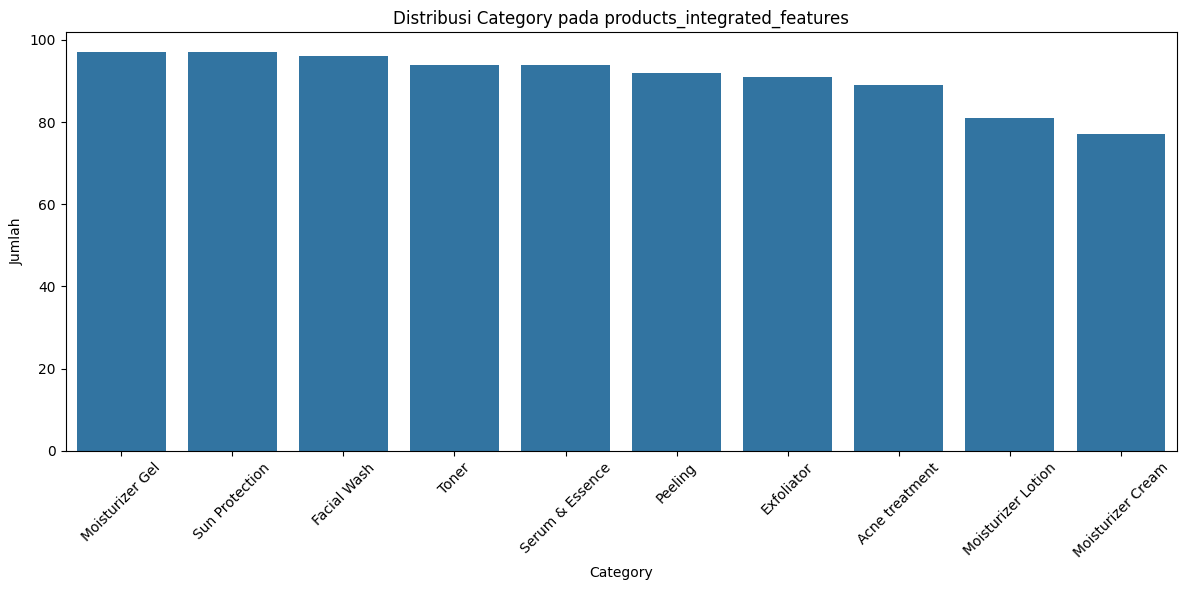

In [302]:
# Visualisasi distribusi categories pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='category', order=products_integrated_features['category'].value_counts().index)
plt.title('Distribusi Category pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [303]:
# Parsing string ke list, membersihkan, dan flatten
def parse_string(cell):
    try:
        parsed = ast.literal_eval(cell)
    except:
        parsed = [cell]

    flat_list = []
    for item in parsed:
        if isinstance(item, str):
            parts = [part.strip().lower() for part in item.split(',')]
            for part in parts:
                # Hapus karakter [ ], tanda kutip ', ", dan spasi ekstra
                clean = re.sub(r'[\[\]\'\"]', '', part).strip()
                if clean:
                    flat_list.append(clean)
        else:
            flat_list.append(str(item).strip().lower())

    return flat_list

In [304]:
# Apply ke kolom ingredient category
products_integrated_features['ingredient_category'] = products_integrated_features['ingredient_category'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing ingredient_category:")
print(products_integrated_features['ingredient_category'].head())

Contoh hasil parsing ingredient_category:
0                 [hydrating]
1                   [calming]
2               [brightening]
3    [hydrating, brightening]
4                 [hydrating]
Name: ingredient_category, dtype: object


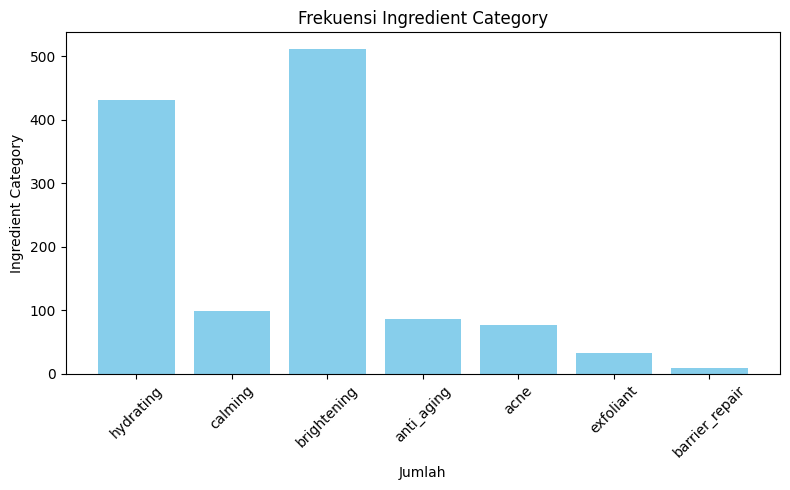

In [305]:
# Flatten semua list jadi satu list besar
all_ingredients = sum(products_integrated_features['ingredient_category'], [])

# Hitung frekuensi setiap ingredient category
ingredient_counts = Counter(all_ingredients)

# Buat plot untuk frekuensi ingredient category
plt.figure(figsize=(8, 5))
plt.bar(ingredient_counts.keys(), ingredient_counts.values(), color='skyblue')
plt.title('Frekuensi Ingredient Category')
plt.xlabel('Jumlah')
plt.ylabel('Ingredient Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [306]:
# Apply ke kolom skin_type
products_integrated_features['skin_type_cleaned'] = products_integrated_features['skin_type'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_type:")
print(products_integrated_features['skin_type_cleaned'].head())

Contoh hasil parsing skin_type:
0          [dry, normal]
1     [combination, dry]
2    [combination, oily]
3    [combination, oily]
4     [combination, dry]
Name: skin_type_cleaned, dtype: object


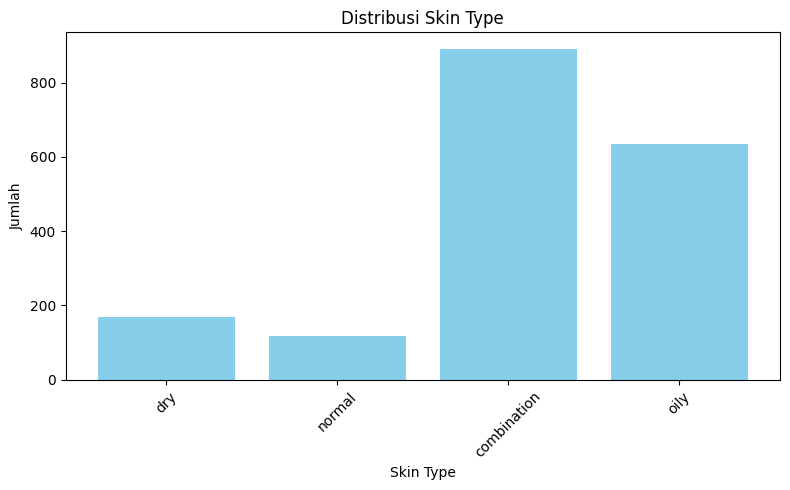

In [307]:
# Flatten semua list jadi satu list besar
all_skin_types = sum(products_integrated_features['skin_type_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_type_counts = Counter(all_skin_types)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_type_counts.keys(), skin_type_counts.values(), color='skyblue')
plt.title('Distribusi Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [308]:
# Apply ke kolom skin_concern
products_integrated_features['skin_concern_cleaned'] = products_integrated_features['skin_concern'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_type:")
print(products_integrated_features['skin_concern_cleaned'].head())

Contoh hasil parsing skin_type:
0         [acne, blackheads]
1    [sensitive, irritation]
2            [acne, redness]
3        [pores, blackheads]
4       [dryness, sensitive]
Name: skin_concern_cleaned, dtype: object


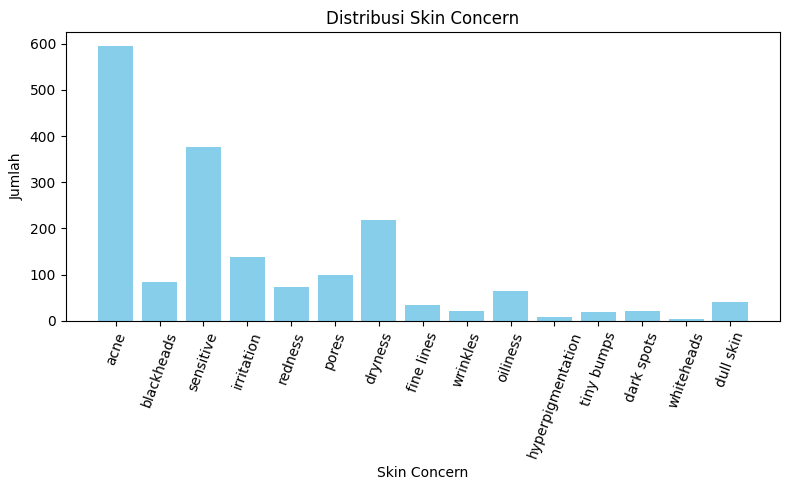

In [309]:
# Flatten semua list jadi satu list besar
all_skin_concern = sum(products_integrated_features['skin_concern_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_concern_counts = Counter(all_skin_concern)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_concern_counts.keys(), skin_concern_counts.values(), color='skyblue')
plt.title('Distribusi Skin Concern')
plt.xlabel('Skin Concern')
plt.ylabel('Jumlah')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [310]:
# Apply ke kolom skin_goal
products_integrated_features['skin_goal_cleaned'] = products_integrated_features['skin_goal'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_goal:")
print(products_integrated_features['skin_goal_cleaned'].head())

Contoh hasil parsing skin_goal:
0          [brightening, hydrating]
1            [hydrating, smoothing]
2         [calming, fast-absorbing]
3    [pore-minimizing, brightening]
4         [barrier-repair, calming]
Name: skin_goal_cleaned, dtype: object


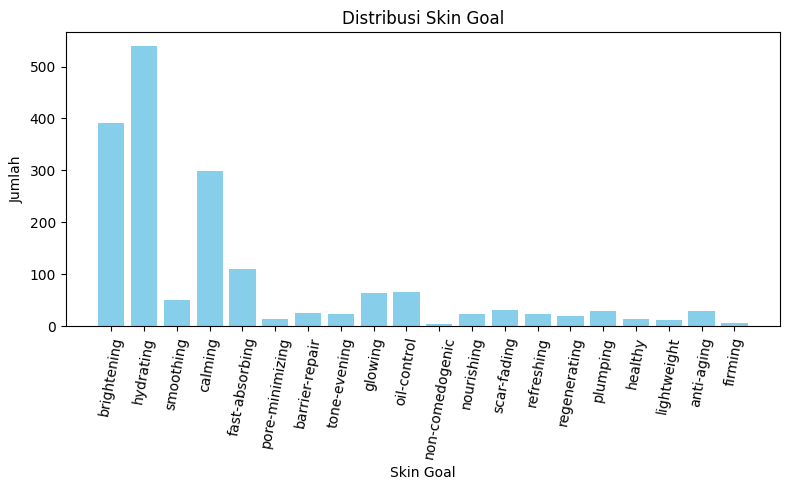

In [311]:
# Flatten semua list jadi satu list besar
all_skin_goal = sum(products_integrated_features['skin_goal_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_goal_counts = Counter(all_skin_goal)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_goal_counts.keys(), skin_goal_counts.values(), color='skyblue')
plt.title('Distribusi Skin Goal')
plt.xlabel('Skin Goal')
plt.ylabel('Jumlah')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

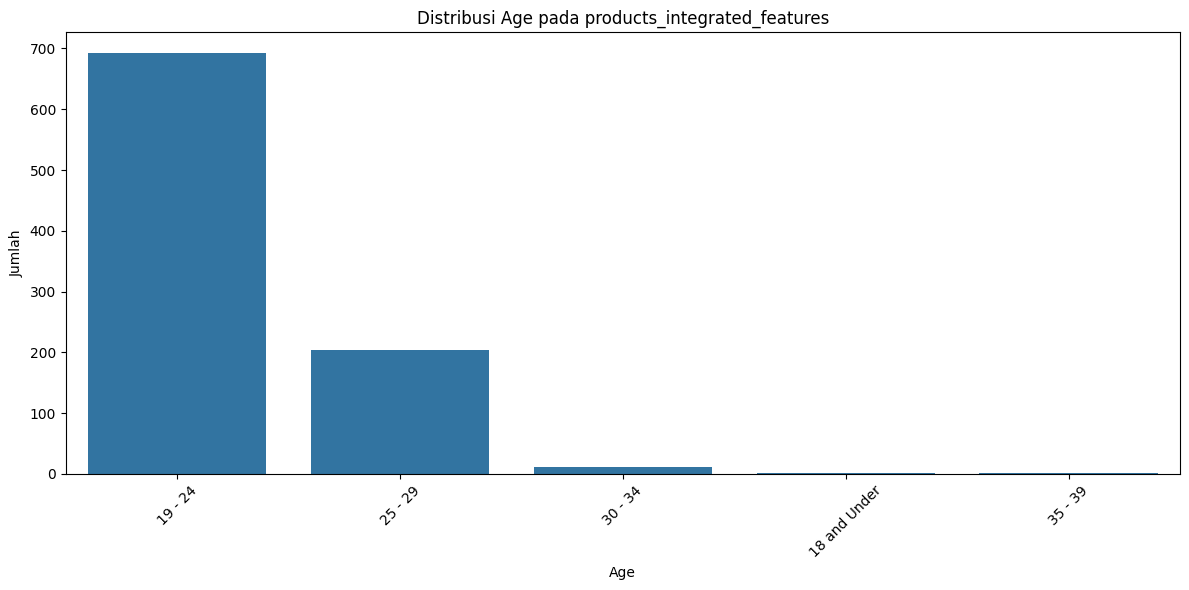

In [312]:
# Visualisasi distribusi age pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='age', order=products_integrated_features['age'].value_counts().index)
plt.title('Distribusi Age pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()